In [72]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir('/home/justin/Desktop/nba capstone/')

In [3]:
salaries=pd.read_csv('NBASalaries1990to2016.csv')
salaries.head(2)

,Team,Season_Start,Season_End,Rk,Player,Salary
0,Atlanta Hawks,1990,1991,1,Moses Malone,2406000
1,Atlanta Hawks,1990,1991,2,Dominique Wilkins,2065000


In [4]:
salaries.columns

Index(['Team', 'Season_Start', 'Season_End', 'Rk', 'Player', 'Salary'], dtype='object')

In [5]:
salaries=salaries[salaries.Season_End>=2000]

In [6]:
len(salaries)-salaries.count()

Team            0
Season_Start    0
Season_End      0
Rk              0
Player          0
Salary          0
dtype: int64

In [7]:
stats=pd.read_csv("Seasons_Stats.csv")
stats.head(2)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0


In [8]:
stats=stats[stats.Year>=2000]

In [9]:
stats=stats.drop(["TOV%","MP","Unnamed: 0","ORB","DRB","TOV","PF","OWS","DWS","OBPM","DBPM","blanl","WS/48","blank2","2P","2PA","2P%"],axis=1)

In [10]:
stats.head(2)

,Year,Player,Pos,Age,Tm,G,GS,PER,TS%,3PAr,...,3P%,eFG%,FT,FTA,FT%,TRB,AST,STL,BLK,PTS
14470,2000.0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,13.6,0.477,0.036,...,0.130,0.426,146.0,193.0,0.756,291.0,98.0,59.0,28.0,697.0
14471,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,14.4,0.484,0.041,...,0.095,0.435,115.0,151.0,0.762,239.0,72.0,53.0,16.0,563.0


In [11]:
len(stats)-stats.count()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
PER          5
TS%         50
3PAr        53
FTr         53
ORB%         5
DRB%         5
TRB%         5
AST%         5
STL%         5
BLK%         5
USG%         5
WS           0
BPM          0
VORP         0
FG           0
FGA          0
FG%         53
3P           0
3PA          0
3P%       1753
eFG%        53
FT           0
FTA          0
FT%        443
TRB          0
AST          0
STL          0
BLK          0
PTS          0
dtype: int64

In [12]:
stats["3P%"]=stats["3P%"].fillna(0)

In [13]:
len(stats)-stats.count()

Year        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
PER         5
TS%        50
3PAr       53
FTr        53
ORB%        5
DRB%        5
TRB%        5
AST%        5
STL%        5
BLK%        5
USG%        5
WS          0
BPM         0
VORP        0
FG          0
FGA         0
FG%        53
3P          0
3PA         0
3P%         0
eFG%       53
FT          0
FTA         0
FT%       443
TRB         0
AST         0
STL         0
BLK         0
PTS         0
dtype: int64

In [14]:
stats.shape

(10204, 36)

In [15]:
stats["FT%"]=stats["FT%"].fillna(0)

In [16]:
stats["FG%"]=stats["FG%"].fillna(0)

In [17]:
clean_stats=stats.dropna()

In [18]:
clean_stats.shape

(10151, 36)

In [19]:
clean_stats=clean_stats.rename(columns={"Year":"Season_End"})

In [20]:
salaries=salaries.drop(["Season_Start"],axis=1)

In [21]:
salaries[salaries.Player=="Tariq Abdul-Wahad"]

,Team,Season_End,Rk,Player,Salary
2616,Dallas Mavericks,2003,6,Tariq Abdul-Wahad,5625000
2633,Dallas Mavericks,2004,5,Tariq Abdul-Wahad,6187500
2650,Dallas Mavericks,2005,7,Tariq Abdul-Wahad,6750000
2670,Dallas Mavericks,2006,10,Tariq Abdul-Wahad,3656250
2692,Dallas Mavericks,2007,12,Tariq Abdul-Wahad,1968750
2991,Denver Nuggets,2000,9,Tariq Abdul-Wahad,1594920
3000,Denver Nuggets,2001,3,Tariq Abdul-Wahad,4500000
3016,Denver Nuggets,2002,3,Tariq Abdul-Wahad,5062500


In [22]:
clean_stats.head()

,Season_End,Player,Pos,Age,Tm,G,GS,PER,TS%,3PAr,...,3P%,eFG%,FT,FTA,FT%,TRB,AST,STL,BLK,PTS
14470,2000.0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,13.6,0.477,0.036,...,0.130,0.426,146.0,193.0,0.756,291.0,98.0,59.0,28.0,697.0
14471,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,14.4,0.484,0.041,...,0.095,0.435,115.0,151.0,0.762,239.0,72.0,53.0,16.0,563.0
14472,2000.0,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,10.8,0.448,0.015,...,0.500,0.393,31.0,42.0,0.738,52.0,26.0,6.0,12.0,134.0
14473,2000.0,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,20.2,0.547,0.075,...,0.302,0.477,446.0,551.0,0.809,825.0,271.0,89.0,87.0,1663.0
14474,2000.0,Cory Alexander,PG,26.0,DEN,29.0,2.0,8.8,0.381,0.357,...,0.257,0.332,17.0,22.0,0.773,42.0,58.0,24.0,2.0,82.0


In [23]:
clean_stats.Tm.unique()

array(['TOT', 'ORL', 'DEN', 'VAN', 'MIL', 'LAC', 'BOS', 'SAC', 'HOU',
       'CHI', 'POR', 'WAS', 'MIN', 'PHO', 'SEA', 'GSW', 'ATL', 'IND',
       'CLE', 'TOR', 'PHI', 'MIA', 'DAL', 'SAS', 'CHH', 'DET', 'NYK',
       'LAL', 'NJN', 'UTA', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BRK',
       'NOP', 'CHO'], dtype=object)

In [24]:
salaries.Team.unique()

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Caveliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors',
       'Utah Jazz', 'Washington Wizards'], dtype=object)

In [25]:
team_change={'ATL':'Atlanta Hawks', 'BOS':'Boston Celtics', 'BRK':'Brooklyn Nets',
       'CHA':'Charlotte Hornets', 'CHI':'Chicago Bulls', 'CLE':'Cleveland Caveliers',
       'DAL':'Dallas Mavericks', 'DEN':'Denver Nuggets', 'DET':'Detroit Pistons',
       'GSW':'Golden State Warriors', 'HOU':'Houston Rockets', 'IND':'Indiana Pacers',
       'LAC':'Los Angeles Clippers', 'LAL':'Los Angeles Lakers', 'MEM':'Memphis Grizzlies',
       'MIA':'Miami Heat', 'MIL':'Milwaukee Bucks', 'MIN':'Minnesota Timberwolves',
       'NOP':'New Orleans Pelicans', 'NYK':'New York Knicks', 'OKC':'Oklahoma City Thunder',
       'ORL':'Orlando Magic', 'PHI':'Philadelphia 76ers', 'PHO':'Phoenix Suns',
       'SAC':'Sacramento Kings', 'SAS':'San Antonio Spurs', 'TOR':'Toronto Raptors',
       'UTA':'Utah Jazz', 'WAS':'Washington Wizards'}

In [26]:
clean_stats=clean_stats.replace({'Tm':team_change})

In [27]:
clean_stats=clean_stats.rename(columns={'Tm':"Team"})

In [28]:
new=pd.merge(clean_stats,salaries,how="right",on=['Player','Season_End','Team'])

In [29]:
len(new)-new.count()

Season_End       0
Player           0
Pos           1604
Age           1604
Team             0
G             1604
GS            1604
PER           1604
TS%           1604
3PAr          1604
FTr           1604
ORB%          1604
DRB%          1604
TRB%          1604
AST%          1604
STL%          1604
BLK%          1604
USG%          1604
WS            1604
BPM           1604
VORP          1604
FG            1604
FGA           1604
FG%           1604
3P            1604
3PA           1604
3P%           1604
eFG%          1604
FT            1604
FTA           1604
FT%           1604
TRB           1604
AST           1604
STL           1604
BLK           1604
PTS           1604
Rk               0
Salary           0
dtype: int64

In [30]:
clean_stats.shape

(10151, 36)

In [31]:
salaries.shape

(8022, 5)

In [32]:
new.shape

(8022, 38)

In [36]:
new=new.dropna()
new.head()

,Season_End,Player,Pos,Age,Team,G,GS,PER,TS%,3PAr,...,FT,FTA,FT%,TRB,AST,STL,BLK,PTS,Rk,Salary
0,2000.0,Tariq Abdul-Wahad,SG,25.0,Denver Nuggets,15.0,10.0,10.8,0.448,0.015,...,31.0,42.0,0.738,52.0,26.0,6.0,12.0,134.0,9,1594920
1,2000.0,Cory Alexander,PG,26.0,Denver Nuggets,29.0,2.0,8.8,0.381,0.357,...,17.0,22.0,0.773,42.0,58.0,24.0,2.0,82.0,8,1980000
2,2000.0,Ray Allen,SG,24.0,Milwaukee Bucks,82.0,82.0,20.6,0.570,0.288,...,353.0,398.0,0.887,359.0,308.0,110.0,19.0,1809.0,1,9000000
3,2000.0,Rafer Alston,PG,23.0,Milwaukee Bucks,27.0,0.0,4.3,0.310,0.147,...,3.0,4.0,0.750,23.0,70.0,12.0,0.0,60.0,16,301875
4,2000.0,John Amaechi,C,29.0,Orlando Magic,80.0,53.0,13.2,0.505,0.009,...,223.0,291.0,0.766,266.0,95.0,35.0,37.0,836.0,27,385000


In [65]:
new['Salary_Rank']=new[new.Season_End==2010]['Salary'].rank(ascending=False)

In [42]:
new['Salary_Rank']=new[new.Season_End==2000]['Salary'].rank(ascending=False)

In [43]:
new['Salary_Rank']=new[new.Season_End==2001]['Salary'].rank(ascending=False)

In [44]:
new['Salary_Rank']=new[new.Season_End==2002]['Salary'].rank(ascending=False)

In [45]:
new['Salary_Rank']=new[new.Season_End==2003]['Salary'].rank(ascending=False)

In [46]:
new['Salary_Rank']=new[new.Season_End==2004]['Salary'].rank(ascending=False)

In [47]:
new['Salary_Rank']=new[new.Season_End==2005]['Salary'].rank(ascending=False)

In [48]:
new['Salary_Rank']=new[new.Season_End==2006]['Salary'].rank(ascending=False)

In [49]:
new['Salary_Rank']=new[new.Season_End==2007]['Salary'].rank(ascending=False)

In [50]:
new['Salary_Rank']=new[new.Season_End==2008]['Salary'].rank(ascending=False)

In [51]:
new['Salary_Rank']=new[new.Season_End==2009]['Salary'].rank(ascending=False)

In [63]:
new['Salary_Rank']=new[new.Season_End==2011]['Salary'].rank(ascending=False)

In [54]:
new['Salary_Rank']=new[new.Season_End==2012]['Salary'].rank(ascending=False)

In [55]:
new['Salary_Rank']=new[new.Season_End==2013]['Salary'].rank(ascending=False)

In [56]:
new['Salary_Rank']=new[new.Season_End==2014]['Salary'].rank(ascending=False)

In [61]:
new['Salary_Rank']=new[new.Season_End==2015]['Salary'].rank(ascending=False)

In [58]:
new['Salary_Rank']=new[new.Season_End==2016]['Salary'].rank(ascending=False)

In [66]:
new.Season_End.unique()

array([ 2000.,  2001.,  2002.,  2003.,  2004.,  2005.,  2006.,  2007.,
        2008.,  2009.,  2010.,  2011.,  2012.,  2013.,  2014.,  2015.,
        2016.])

In [64]:
len(new)-new.count()

Season_End        0
Player            0
Pos               0
Age               0
Team              0
G                 0
GS                0
PER               0
TS%               0
3PAr              0
FTr               0
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
USG%              0
WS                0
BPM               0
VORP              0
FG                0
FGA               0
FG%               0
3P                0
3PA               0
3P%               0
eFG%              0
FT                0
FTA               0
FT%               0
TRB               0
AST               0
STL               0
BLK               0
PTS               0
Rk                0
Salary            0
Salary_Rank    6024
dtype: int64

In [69]:
s2010=new[new.Season_End==2010]
s2010.shape

(381, 39)

In [70]:
s2010.head()

,Season_End,Player,Pos,Age,Team,G,GS,PER,TS%,3PAr,...,FTA,FT%,TRB,AST,STL,BLK,PTS,Rk,Salary,Salary_Rank
3589,2010.0,Arron Afflalo,SG,24.0,Denver Nuggets,82.0,75.0,10.9,0.576,0.426,...,98.0,0.735,252.0,138.0,46.0,30.0,724.0,12,1086240,289.0
3590,2010.0,Alexis Ajinca,C,21.0,Charlotte Hornets,6.0,0.0,6.3,0.479,0.000,...,1.0,0.000,4.0,0.0,1.0,1.0,10.0,11,1372080,259.0
3591,2010.0,Joe Alexander,SF,23.0,Chicago Bulls,8.0,0.0,2.8,0.273,0.167,...,3.0,0.667,5.0,2.0,1.0,1.0,4.0,8,2583360,193.0
3592,2010.0,Malik Allen,PF,31.0,Denver Nuggets,51.0,3.0,5.9,0.431,0.052,...,13.0,0.923,82.0,16.0,11.0,5.0,105.0,11,1300000,274.0
3593,2010.0,Ray Allen,SG,34.0,Boston Celtics,80.0,80.0,15.2,0.601,0.410,...,253.0,0.913,253.0,210.0,64.0,25.0,1304.0,2,18776860,8.0


In [71]:
s2010.sort_values(['Salary_Rank'])

,Season_End,Player,Pos,Age,Team,G,GS,PER,TS%,3PAr,...,FTA,FT%,TRB,AST,STL,BLK,PTS,Rk,Salary,Salary_Rank
3832,2010.0,Tracy McGrady,SG,30.0,New York Knicks,24.0,24.0,12.2,0.469,0.287,...,57.0,0.754,89.0,93.0,15.0,12.0,226.0,1,23239562,1.0
3646,2010.0,Kobe Bryant,SG,31.0,Los Angeles Lakers,73.0,73.0,21.9,0.545,0.192,...,541.0,0.811,391.0,365.0,113.0,20.0,1970.0,1,23034375,2.0
3861,2010.0,Jermaine O'Neal,C,31.0,Miami Heat,70.0,70.0,17.9,0.563,0.003,...,225.0,0.720,486.0,92.0,25.0,95.0,950.0,1,23016000,3.0
3694,2010.0,Tim Duncan,C,33.0,San Antonio Spurs,78.0,77.0,24.7,0.560,0.010,...,374.0,0.725,788.0,246.0,45.0,117.0,1395.0,1,22183220,4.0
3859,2010.0,Dirk Nowitzki,PF,31.0,Dallas Mavericks,81.0,80.0,22.9,0.578,0.081,...,586.0,0.915,620.0,218.0,70.0,79.0,2027.0,1,19795714,5.0
3875,2010.0,Paul Pierce,SF,32.0,Boston Celtics,71.0,71.0,18.2,0.613,0.303,...,433.0,0.852,310.0,218.0,84.0,31.0,1296.0,1,19795712,6.0
3811,2010.0,Rashard Lewis,PF,30.0,Orlando Magic,72.0,72.0,14.0,0.573,0.525,...,180.0,0.806,318.0,107.0,78.0,28.0,1013.0,1,18876000,7.0
3593,2010.0,Ray Allen,SG,34.0,Boston Celtics,80.0,80.0,15.2,0.601,0.410,...,253.0,0.913,253.0,210.0,64.0,25.0,1304.0,2,18776860,8.0
3887,2010.0,Michael Redd,SG,30.0,Milwaukee Bucks,18.0,12.0,12.1,0.444,0.282,...,66.0,0.712,54.0,39.0,19.0,2.0,215.0,1,17040000,9.0
3802,2010.0,Andrei Kirilenko,SF,28.0,Utah Jazz,58.0,35.0,18.2,0.588,0.185,...,234.0,0.744,264.0,158.0,83.0,71.0,688.0,1,16452000,10.5


/home/justin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


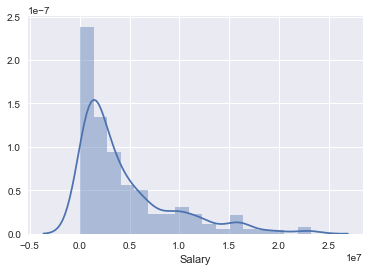

In [76]:
sns.distplot(s2010['Salary'])

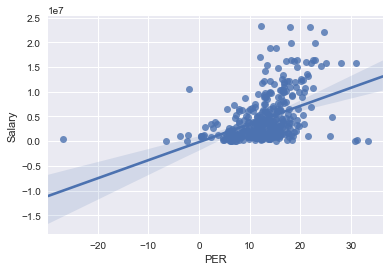

In [78]:
sns.regplot(x='PER', y='Salary', scatter=True, data=s2010)

In [80]:
s2010[s2010.PER<-10]

,Season_End,Player,Pos,Age,Team,G,GS,PER,TS%,3PAr,...,FTA,FT%,TRB,AST,STL,BLK,PTS,Rk,Salary,Salary_Rank
3807,2010.0,Marcus Landry,SF,24.0,Boston Celtics,1.0,0.0,-26.8,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,457588,354.5


In [83]:
new=new[new.PER>-10]

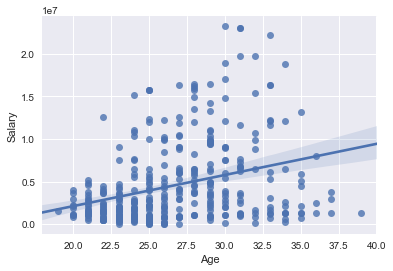

In [85]:
sns.regplot(x='Age', y='Salary', scatter=True, data=s2010)

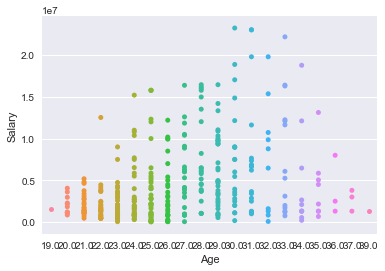

In [87]:
sns.stripplot(x="Age", y="Salary", data=s2010)